In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import h5py as hdf

In [ ]:
root_folder = 'drive/content/My Drive/landslide4sense/TrainData/img/'

In [ ]:
import os

In [ ]:
os.chdir('drive/My Drive/landslide4sense/TrainData/img')

In [ ]:
print(os.getcwd())

/content/drive/My Drive/landslide4sense/TrainData/img


In [ ]:
hdf_file = hdf.File('image_1.h5', 'r')
print(list(hdf_file.keys()))

['img']


In [ ]:
def print_structure(name, obj):
  print(name, obj)

hdf_file.visititems(print_structure)

img <HDF5 dataset "img": shape (128, 128, 14), type "<f8">


In [ ]:

img = hdf_file['img']

if isinstance(img, hdf.Dataset):
    print('img is a dataset')
    print('Shape:', img.shape)
    print('Dtype:', img.dtype)
elif isinstance(img, hdf.Group):
    print('img is a group')


img is a dataset
Shape: (128, 128, 14)
Dtype: float64


In [ ]:
import numpy as np

In [ ]:
data = np.array(img)
print(data.shape, type(data))

(128, 128, 14) <class 'numpy.ndarray'>


In [ ]:
import matplotlib.pyplot as plt

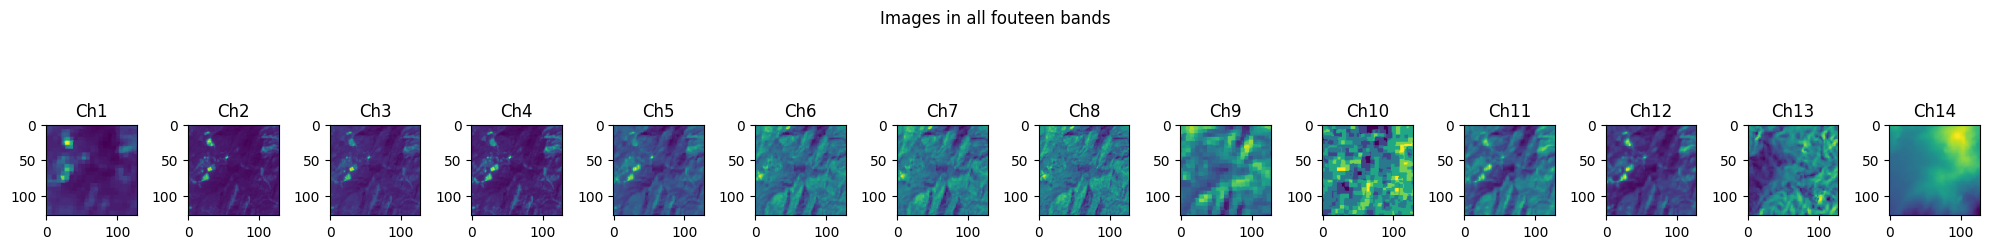

In [60]:
'''for i in range(data.shape[2]):
  plt.imshow(data[:,:,i],cmap = 'gray')
  plt.title(f'Channel {i+1}')
  plt.show()'''
plt.ioff()

fig, axes = plt.subplots(1,data.shape[2], figsize=(20,3))
fig.suptitle("Images in all fouteen bands")
for i in range(data.shape[2]):
  axes[i].imshow(data[:,:,i], cmap = 'viridis')
  axes[i].set_title(f'Ch{i+1}')
plt.tight_layout()
plt.show()

In [56]:
# Now I want to map each image to its corresponding mask

In [61]:
img_folder = "/content/drive/My Drive/landslide4sense/TrainData/img"
mask_folder = "/content/drive/My Drive/landslide4sense/TrainData/mask"

In [66]:
import re

In [67]:
def extract_number(filename):
  match = re.search(r'(\d+)', filename)
  return int(match.group()) if match else 0

In [ ]:
img_files = sorted([i for i in os.listdir(img_folder)], key= extract_number)
print(img_files[::-1])

In [ ]:
mask_files = sorted([m for m in os.listdir(mask_folder)], key = extract_number)
print(mask_files[::-1])

In [76]:
assert len(img_files) == len(mask_files)

In [107]:
#Function to read the hdf5 data

def read_hdf(hdf_filepath,dataset_path):
  file = hdf.File(hdf_filepath, 'r')
  data = file[dataset_path][:]
  return np.array(data)

In [97]:
os.getcwd()

'/content/drive/MyDrive/landslide4sense/TrainData/mask'

In [93]:
os.chdir('/content/drive/MyDrive/landslide4sense/TrainData/mask')

In [106]:
#Challenge : Without looking the implementation of img, find out the datasets in mask
maskfile = hdf.File('mask_1.h5', 'r')

print(list(maskfile.keys()))
maskfile.visititems(display_name)

['mask']
mask <HDF5 dataset "mask": shape (128, 128), type "|u1">


In [105]:
def display_name(path, obj):
  print(path, obj)

In [109]:
os.chdir('/content/drive/My Drive/landslide4sense/TrainData')

In [117]:
os.getcwd()

'/content/drive/MyDrive/landslide4sense/TrainData'

In [153]:
# Now we display images and masks
def display(random_number):
  img_to_plot = read_hdf(img_folder+f'/{img_files[random_number-1]}','img')
  mask_to_plot= read_hdf(mask_folder+f'/{mask_files[random_number-1]}','mask')
  fig, axes = plt.subplots(1, 15, figsize = (20,2))
  fig.suptitle("Images and mask")
  for i in range(15):
    if i == 14:
      axes[i].imshow(mask_to_plot[:,:], cmap = 'viridis')
      axes[i].set_title('mask')
    else:
      axes[i].imshow(img_to_plot[:,:,i], cmap = 'viridis')
      axes[i].set_title(f'Ch{i+1}')
    axes[i].axis('off')
  plt.show()


In [139]:
import random as rand

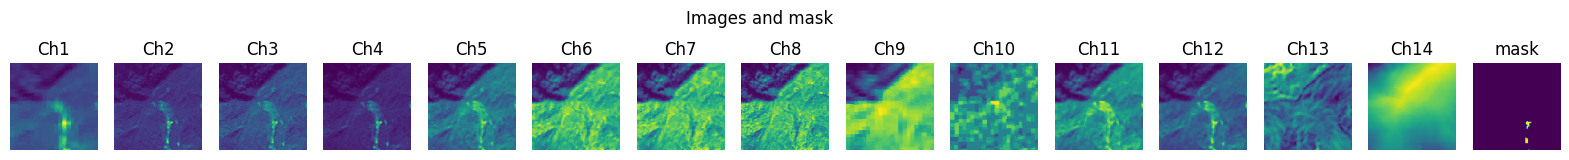

In [154]:
display(rand.randint(1, 3799))